루키즈 개발 5기 박미정

## 4-1. 인구현황 데이터 분석 (필수)

In [23]:
import pandas as pd

df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_except_all = df[df['행정기관'] != '전국']
df_sorted = df_except_all.sort_values(by='총인구수', ascending=False)

### 1. 지역별 총인구수 Top5

In [24]:
# '총인구수' 기준 내림차순 정렬 후 상위 5개 추출
top5_population = df_sorted.head(5)
result = top5_population[['행정기관', '총인구수']]
display(result)

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [ ]:
### 1-1. 지역별 총인구수 plot

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [15]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

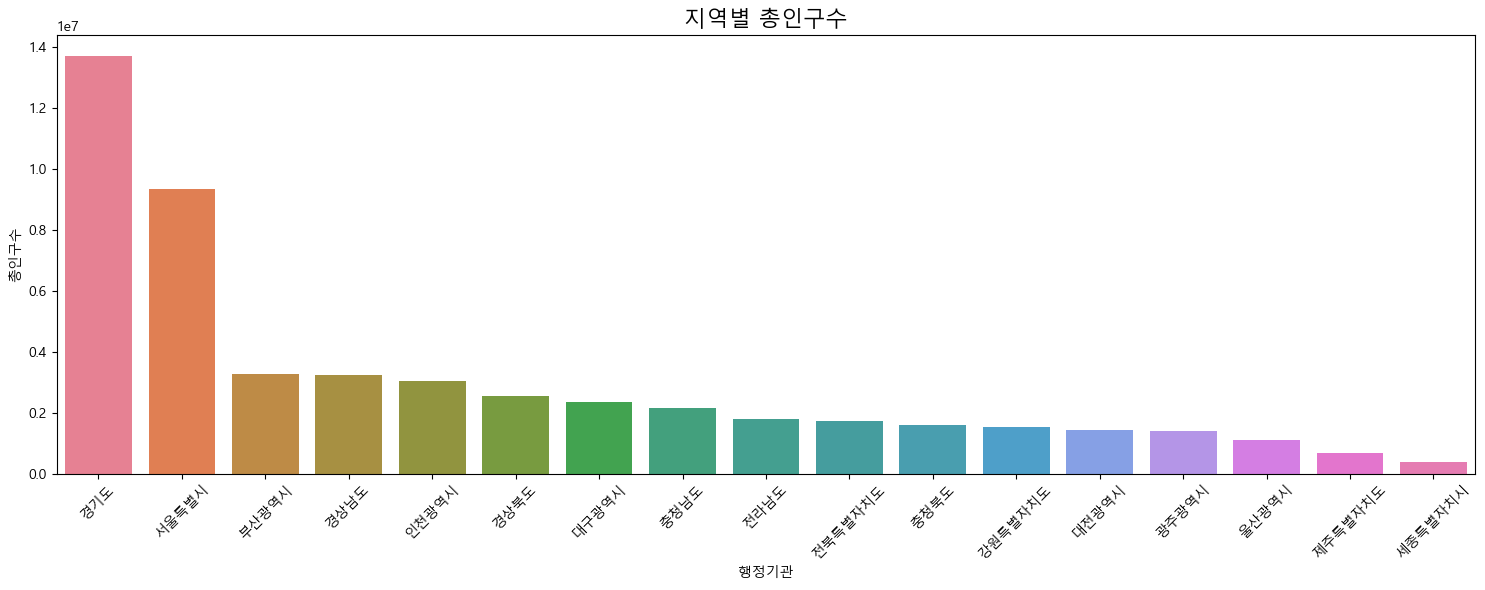

In [ ]:
plt.figure(figsize=(15, 6)) 

# sns.barplot을 사용해야 막대별로 다른 색상이 자동 할당
ax = sns.barplot(data=df_sorted, x='행정기관', y='총인구수', hue='행정기관', palette='husl', legend=False)

plt.title('지역별 총인구수', fontsize=16)
plt.xticks(rotation=45) # 지역명이 대각선으로 겹치지 않게 회전
plt.xlabel('행정기관')
plt.ylabel('총인구수')

plt.tight_layout()
plt.show()